In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import re
from math import hypot
from scipy.stats import norm
from scipy import stats
from matplotlib.transforms import ScaledTranslation


In [2]:
def load_data_to_dataframe(directory):
    """
    Scans a directory for CSV files containing matrix data, extracts 
    parameters from filenames, loads each matrix, flattens it, and 
    returns everything in a single pandas DataFrame.

    Args:
        directory (str): The path to the directory containing the CSV files.

    Returns:
        pandas.DataFrame: A DataFrame where each row corresponds to a file,
                          with columns for parameters and the flattened data.
    """
    pattern = re.compile(r'A2_0.1000_tau_(\d+\.?\d*)_beta_(\d+\.?\d*)\.csv$')
    
    all_files_data = []

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        
        if match:
            tau_val, beta_val = match.groups()
            file_path = os.path.join(directory, filename)
            
            # --- This is the key change ---
            # 1. Read the full MxM matrix into a DataFrame
            matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
            
            # 2. Get the underlying NumPy array and flatten it into a 1D array
            flattened_data = matrix_df.values.flatten()
            # -----------------------------
            
            data_row = {
                #'a2_param': float(a2_val),
                'tau': float(tau_val),
                'beta': float(beta_val),
                # The 'data' column now holds a 1D NumPy array
                'data': flattened_data
            }
            
            all_files_data.append(data_row)
            
    if not all_files_data:
        print("⚠️ No matching files were found.")
        return pd.DataFrame()
        
    return pd.DataFrame(all_files_data)

In [3]:
Tot_directory = "../Displ"
x_directory = "../Displ_x"
y_directory = "../Displ_y"

df_D = load_data_to_dataframe(Tot_directory)


/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_94115/2376230429.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_94115/2376230429.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_94115/2376230429.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  matrix_df = pd.read_csv(file_path, header=None,delim_whitespace=True)
/var/folders/06/3zrj5_vd2_n7v_11httjb1d80000gn/T/ipykernel_94115/2376230429.py:27: FutureWarning: The 'delim_

In [4]:
df_D.head()

,tau,beta,data
0,0.2,2.0,"[33.533, 33.622, 56.0345, 14.1057, 115.053, 54..."
1,0.2,3.0,"[77.8256, 118.683, 69.7996, 7.4173, 31.0722, 5..."
2,0.4,5.0,"[22.6377, 7.14915, 2.58355, 2.30794, 0.551558,..."
3,0.6,1.0,"[21.4282, 13.0551, 10.7583, 32.3471, 27.7408, ..."
4,0.4,4.0,"[4.81352, 16.3991, 18.0483, 14.0924, 5.94431, ..."


In [12]:
df_filtered = df_D[df_D['a2_param'] == 0.1]

KeyError: 'a2_param'

In [7]:
df_filtered

,a2_param,tau,beta,data
22,0.1,0.2,2.0,"[33.533, 33.622, 56.0345, 14.1057, 115.053, 54..."
23,0.1,0.2,3.0,"[77.8256, 118.683, 69.7996, 7.4173, 31.0722, 5..."
62,0.1,0.4,5.0,"[22.6377, 7.14915, 2.58355, 2.30794, 0.551558,..."
63,0.1,0.6,1.0,"[21.4282, 13.0551, 10.7583, 32.3471, 27.7408, ..."
64,0.1,0.4,4.0,"[4.81352, 16.3991, 18.0483, 14.0924, 5.94431, ..."
65,0.1,0.9,5.0,"[14.9978, 2.1057, 2.0905, 4.66964, 17.2703, 1...."
66,0.1,0.9,4.0,"[9.37337, 2.34038, 5.75896, 1.90542, 3.73048, ..."
69,0.1,0.8,1.0,"[3.51081, 9.61535, 10.7574, 23.3684, 2.31538, ..."
70,0.1,0.5,1.0,"[16.6144, 12.5148, 24.8641, 6.27733, 24.1216, ..."
71,0.1,0.7,4.0,"[6.93197, 5.08626, 1.99297, 9.73981, 12.592, 1..."


In [5]:
df_long_filtered = df_D.explode('data')

In [6]:
df_long_filtered

,tau,beta,data
0,0.2,2.0,33.533
0,0.2,2.0,33.622
0,0.2,2.0,56.0345
0,0.2,2.0,14.1057
0,0.2,2.0,115.053
...,...,...,...
49,0.8,4.0,6.37869
49,0.8,4.0,0.927604
49,0.8,4.0,3.30226
49,0.8,4.0,7.73315


In [7]:
df_long_filtered = df_long_filtered[df_long_filtered['data'] <= 30]

In [8]:
df_long_filtered = df_long_filtered.sample(frac=0.1, random_state=1)

In [9]:
df_long_filtered

,tau,beta,data
15,0.7,2.0,7.94565
2,0.4,5.0,3.59169
45,0.5,5.0,0.560861
30,0.8,2.0,9.93484
21,0.9,2.0,9.22826
...,...,...,...
6,0.9,4.0,20.8386
7,0.8,1.0,9.24077
27,0.3,4.0,2.29864
0,0.2,2.0,0.279682


AttributeError: Line2D.set() got an unexpected keyword argument 'style'

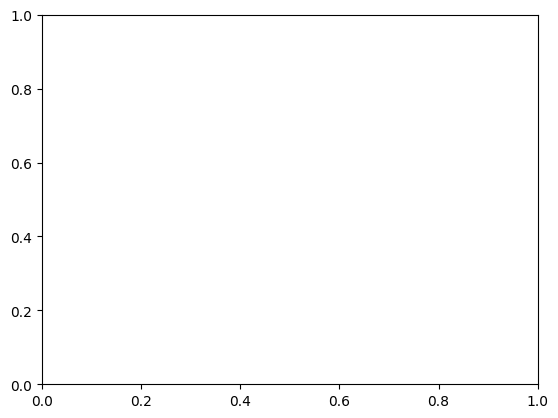

In [12]:
sns.kdeplot(data=df_long_filtered, x='data', hue='tau',style="beta",  common_norm=False, alpha=0.5,clip=(0, 40))

TypeError: Axes.bxp() got an unexpected keyword argument 'clip'

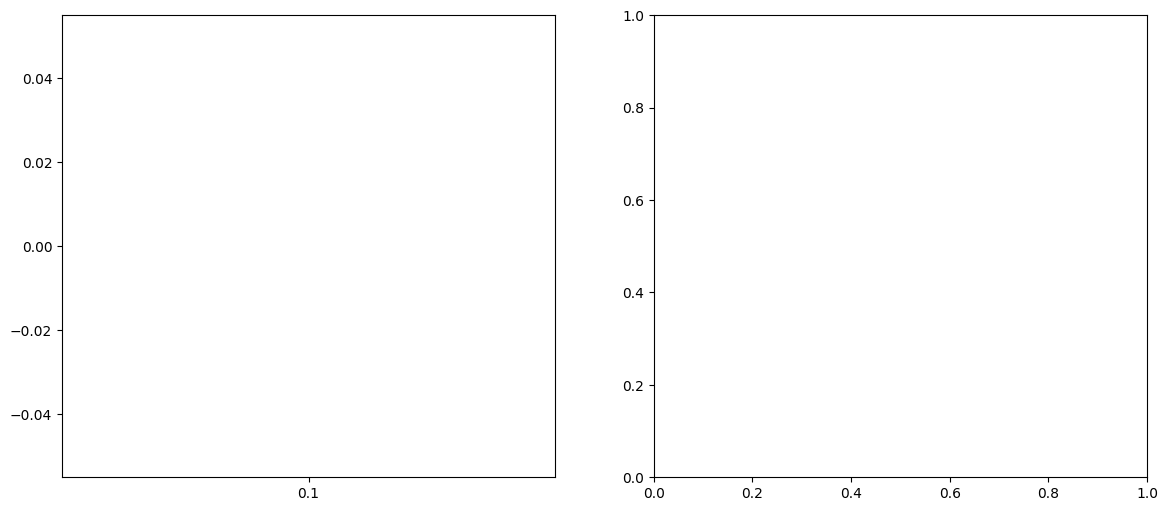

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Tau vs. Mean Value
sns.boxplot(ax=axes[0], data=df_long_filtered, x='tau', y='data',clip=(0, 40))
axes[0].set_title('Mean Value Distribution by Tau')
axes[0].set_xlabel('Tau')
axes[0].set_ylabel('Mean Value')

# Box plot for Beta vs. Mean Value
sns.boxplot(ax=axes[1], data=df_long_filtered, x='beta', y='data',clip=(0, 40))
axes[1].set_title('Mean Value Distribution by Beta')
axes[1].set_xlabel('Beta')
axes[1].set_ylabel('') # Hide y-label for the second plot for a cleaner look

In [10]:
g = sns.displot(
    data=df_long_filtered,
    x="data",
    hue="tau",
    col="beta",
    kind="kde",
    col_wrap=3,       # Wrap the panels into a grid with 3 columns
    palette="viridis",  # Use a nice color palette
    height=4,
    aspect=1.2
)

: 